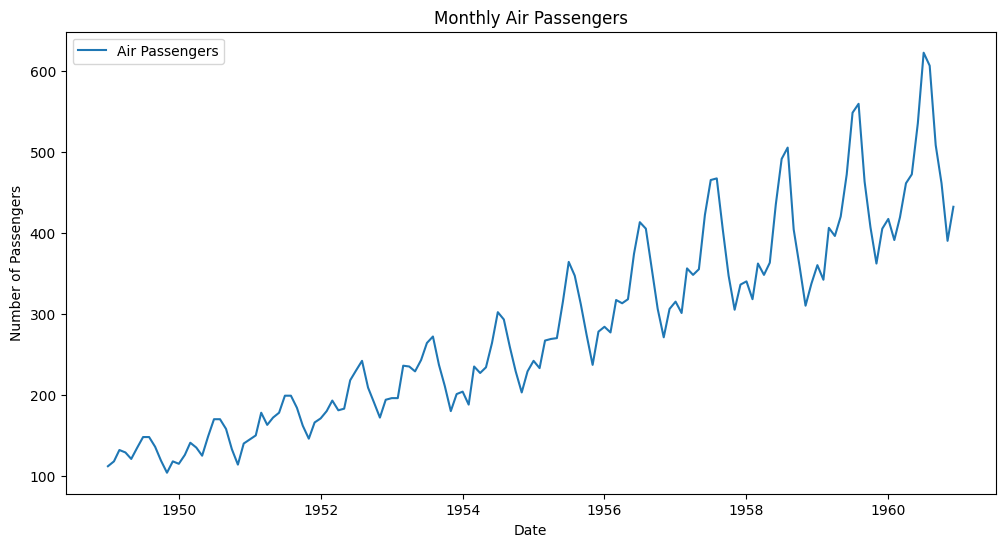

ADF Statistic for Original Series: 0.8153688792060498
p-value: 0.991880243437641
The data is likely non-stationary.

ADF Statistic for 1st Order Differenced: -2.8292668241700047
p-value: 0.05421329028382478
The data is likely non-stationary.

ADF Statistic for Data: -2.717130598388114
p-value: 0.07112054815086184
The data is likely non-stationary.



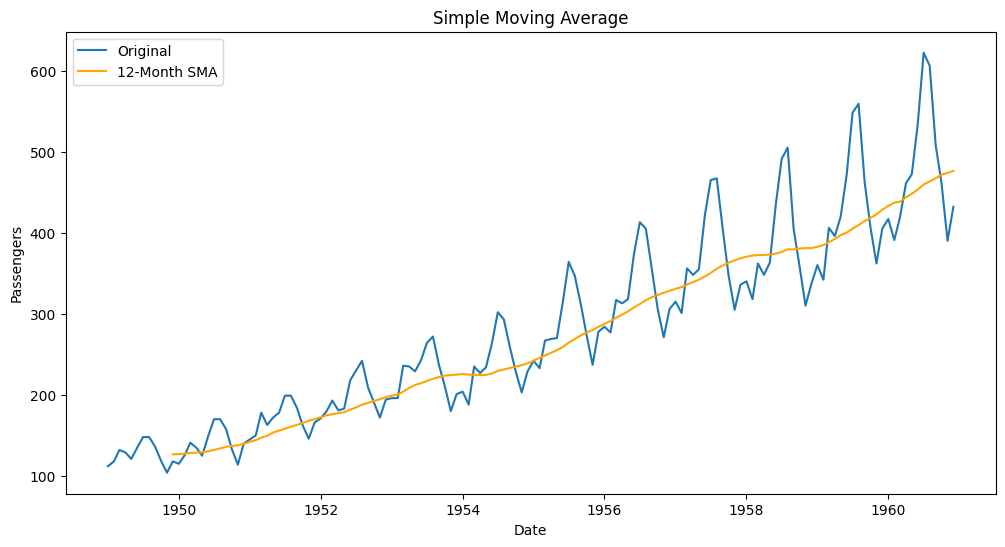

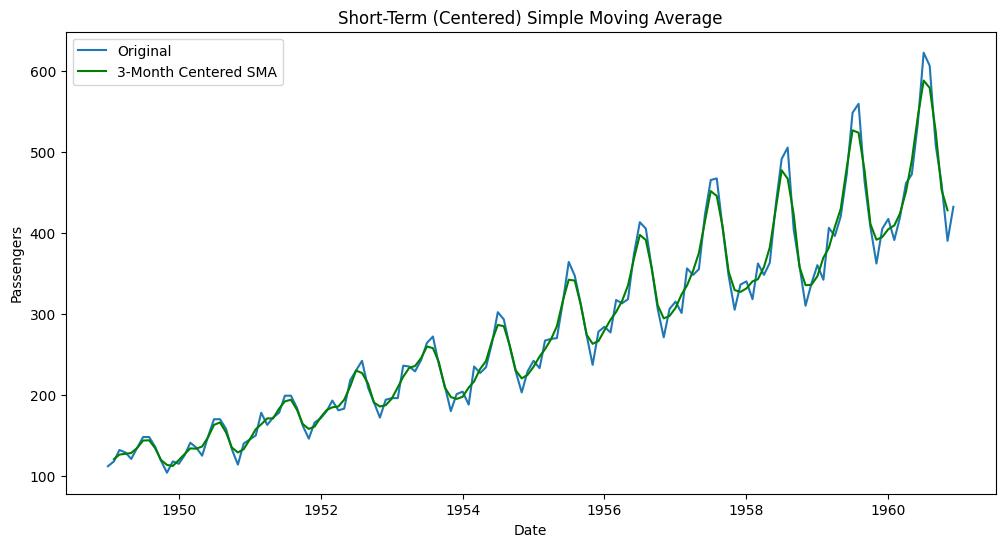

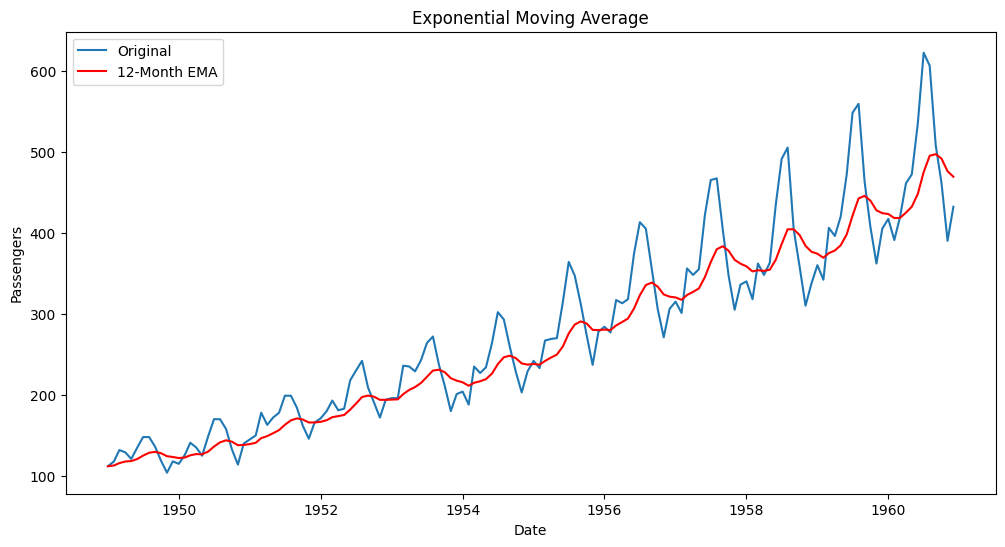

Forecast using last 12-month SMA: 476.17


<ipython-input-1-2336615f45c5>:84: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast = sma[-1]


In [1]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# 2. Load the Air Passengers Dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
df.columns = ['Passengers']

# 3. Visualize the Original Time Series
plt.figure(figsize=(12,6))
plt.plot(df, label='Air Passengers')
plt.title('Monthly Air Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# 4. ADFuller Test to Check Stationarity
def check_stationarity(series, name="Data"):
    result = adfuller(series)
    print(f"ADF Statistic for {name}: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print("The data is likely stationary.\n")
    else:
        print("The data is likely non-stationary.\n")

check_stationarity(df['Passengers'], name="Original Series")

# 5. First Order Differencing
df_diff1 = df.diff().dropna()
df_diff1.columns = ['Passengers Difference']
check_stationarity(df_diff1['Passengers Difference'], name="1st Order Differenced")

# 6. Log Transformation + Differencing
df_log = np.log(df)
df_log_diff = df_log.diff().dropna()
df_log_diff.columns = ['Log-Differenced Series']
check_stationarity(df_log_diff['Log-Differenced Series'])

# 7. Plot Moving Averages
window = 12

# Simple Moving Average (12-month)
sma = df.rolling(window=window).mean()
plt.figure(figsize=(12,6))
plt.plot(df, label='Original')
plt.plot(sma, label='12-Month SMA', color='orange')
plt.title('Simple Moving Average')
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.show()

# Short-Term Simple Moving Average (3-month, centered)
sma_short = df.rolling(window=3, center=True).mean()
plt.figure(figsize=(12,6))
plt.plot(df, label='Original')
plt.plot(sma_short, label='3-Month Centered SMA', color='green')
plt.title('Short-Term (Centered) Simple Moving Average')
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.show()

# Exponential Moving Average
ema = df.ewm(span=window, adjust=False).mean()
plt.figure(figsize=(12,6))
plt.plot(df, label='Original')
plt.plot(ema, label='12-Month EMA', color='red')
plt.title('Exponential Moving Average')
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.show()

# 8. Forecasting using Simple Moving Average (Last Point)
def forecast_using_sma(data, window):
    sma = data['Passengers'].rolling(window=window).mean()
    forecast = sma[-1]
    print(f"Forecast using last {window}-month SMA: {forecast:.2f}")
    return forecast

forecast = forecast_using_sma(df, window=12)